### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.

(kind=)
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)

(bar : 수직그래프, barh : 수평그래프)

(Stacked 속성을 True로 설정하면, 하나의 인덱스에 대한 각 열의 값을 한줄로 쌓아서 나타내준다.)

출처: https://doorbw.tistory.com/173
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경

(히스토그램을 밀도함수와 같이 보여줌)
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)

(히스토그램을 세로로세워서 보여줌)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)

(스캐터플랏과 히스토그램 조인트)
- sns.pairplot(data, hue, palette)

(여러개 다보여줌)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

barh : 수평

* 히트맵 > 색상의 농도에 따라서 시각화시켜줌

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [2]:
df['NDate'] = pd.to_datetime(df.Date)  # datetime으로 변환해서 NDate로 열 만듬
df1 = df.set_index('NDate')  # 만든 NDate로 인덱스 설정
df1.drop(['Date','Volume'], axis=1, inplace = True) # 필요없는거 삭제. 열쪽으로
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

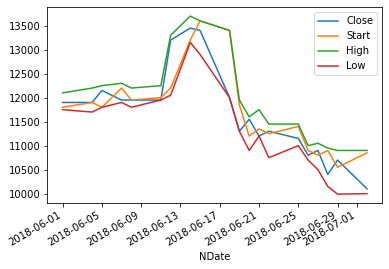

In [3]:
df1.plot()  # plot 디폴트는 선그래프

- 막대 그래프

<AxesSubplot:xlabel='NDate'>

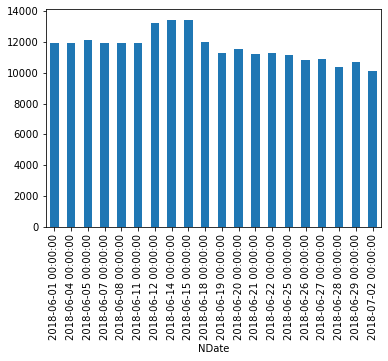

In [4]:
df1.Close[::-1].plot(kind = 'bar')  # [::-1] 정렬해줌. plot:그래프 볼건데 kind:종류는 : bar그래프

<AxesSubplot:xlabel='NDate'>

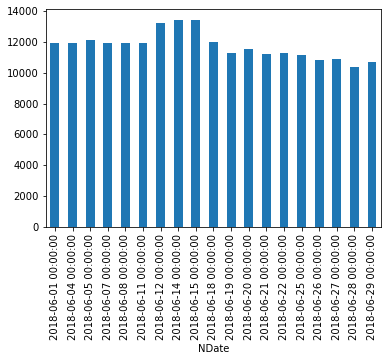

In [5]:
# Q. 6월만을 추출하여 Close 컬럼으로 일별 막대 그래프를 표현하세요.
df1.Close.loc['2018-06'][::-1].plot(kind = 'bar') # 클로즈 열 중 6월, 정렬된 순으로 그래프.
# df1.loc['2018-06','Close'][::-1].plot(kind = 'bar')

- 히스토그램

<AxesSubplot:ylabel='Frequency'>

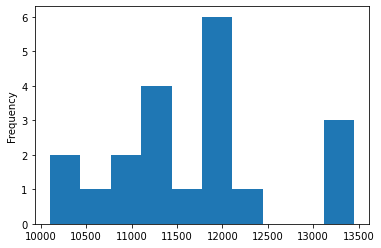

In [6]:
df1.Close.plot(kind='hist', bins = 10)

### 과제7/6-(3)
- df에서 Volume 컬럼의 분포를 탐색하는 히스토그램을 표현하세요.
- Close 컬럼과 Volume 컬럼으로 산점도를 표현하세요.( kind= 'scatter')

In [7]:
df.head()

,Date,Close,Start,High,Low,Volume,NDate
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


<AxesSubplot:ylabel='Frequency'>

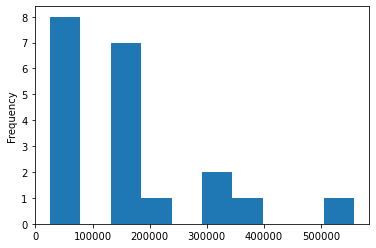

In [8]:
# df에서 Volume 컬럼의 분포를 탐색하는 히스토그램을 표현하세요.
df.Volume.plot(kind= 'hist', bins =10) # bins : 구간

# x축 Volume(컬럼), Y축 기본 인덱스

- 산점도 

In [9]:
df.head()

,Date,Close,Start,High,Low,Volume,NDate
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


<AxesSubplot:xlabel='Close', ylabel='Volume'>

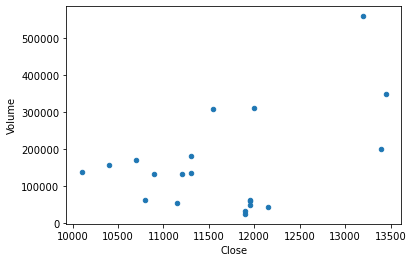

In [10]:
# Close 컬럼과 Volume 컬럼으로 산점도를 표현하세요.( kind= 'scatter')
df.plot(x = 'Close', y = 'Volume', kind = 'scatter')

In [11]:
 df1.corr()
    # corr : 상관관계를 보는 함수. 상관관계가 높을수록 1에 가까움, 음의 상관관계에 가까우면 -1. 0은 관계없음
    # 0.7이상이면 상관관계가 높다고하지만. 실제로는 작아도 의미가 있는 경우가 있음

,Close,Start,High,Low
Close,1.000000,0.856181,0.941201,0.946297
Start,0.856181,1.000000,0.961009,0.921467
High,0.941201,0.961009,1.000000,0.945487
Low,0.946297,0.921467,0.945487,1.000000


- box - plot

In [12]:
df1.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

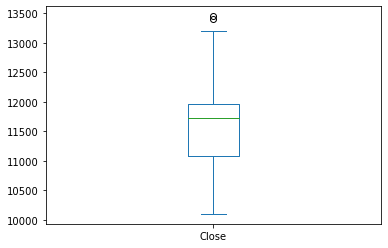

In [13]:
# 맨밑선 : min 박스의 밑변 : 25%(1사분위), 초록선 : 50% , 윗변 : 75%(3사분위), 맨윗선 : max
df1.Close.plot(kind='box')

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값


In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [76]:
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [77]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [86]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df.Close <= (Q1 - IQR*1.5)) | (df.Close >= (Q3 + IQR*1.5))]
abv
# Q3+ IQR*1.5 가 13275이므로 이 수치를 초과하는 밑의 값들은 이상치

,Date,Close,Start,High,Low,Volume
11,2018-06-15,13400,13600,13600,12900,201376
12,2018-06-14,13450,13200,13700,13150,347451


In [87]:
Q3 + IQR*1.5

13275.0

### 과제7/7-(1)
Start 컬럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

In [88]:
df.Start.describe()

count       20.000000
mean     11755.000000
std        865.250192
min      10550.000000
25%      11125.000000
50%      11800.000000
75%      12050.000000
max      13600.000000
Name: Start, dtype: float64

<AxesSubplot:>

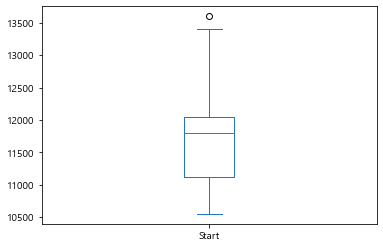

In [92]:
df.Start.plot(kind='box')

In [93]:
# whisker 위에 이상치 존재.

Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
IQR = Q3 - Q1
abv = df[(df.Start <= (Q1 - IQR*1.5)) | (df.Start >= (Q3 + IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume
11,2018-06-15,13400,13600,13600,12900,201376


In [95]:
Q3 + IQR*1.5
# upper whisker가 13437.5 이므로 이를 초과하는 이상치(시가)는 위의 값 하나이다.

13437.5

###  과제7/7-(2)
- mgp 컬럼에 대하여 box plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.
- fish_multi에 대하여 box plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.

In [ ]:
%pwd

In [98]:
import pandas as pd

df_auto = pd.read_excel('../dataset/auto-mpg.xlsx') # .하나는 현재폴더, .하나 추가하면 그 상위폴더.
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<AxesSubplot:>

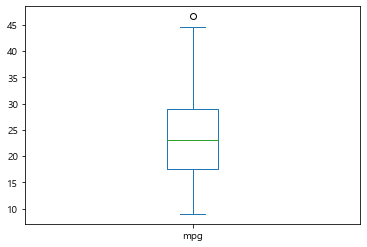

In [100]:
# mgp 컬럼에 대하여 box plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.

df_auto.mpg.plot(kind='box')  # 시각화. 이상치 존재 확인

In [104]:
df_auto.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [103]:
Q1 = df_auto.mpg.describe()['25%']
Q3 = df_auto.mpg.describe()['75%']
IQR = Q3 - Q1
abv = df_auto[(df_auto.mpg <= (Q1 - IQR*1.5)) | (df_auto.mpg >= (Q3+IQR*1.5))]
abv

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc


In [105]:
Q3 + IQR*1.5
# mpg의 upper whisker가 46.25 이므로 위 값(46.6)은 이상치에 해당된다.

46.25

In [156]:
# fish_multi에 대하여 box plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.
import pandas as pd

fish_multi = pd.read_csv('./dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:>

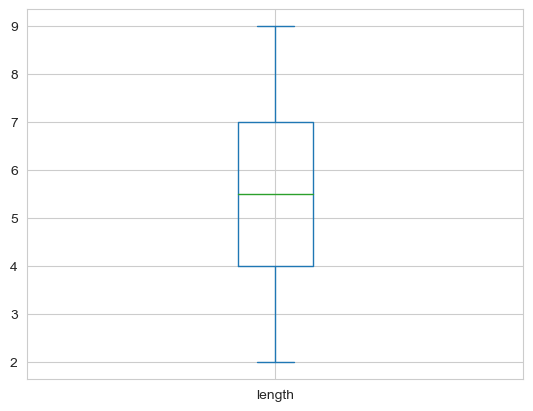

In [153]:
fish_multi.plot(kind='box')

In [154]:
fish_multi.describe()

,length
count,20.00000
mean,5.50000
std,1.90567
min,2.00000
25%,4.00000
50%,5.50000
75%,7.00000
max,9.00000


In [157]:
# 박스플랏 시각화자료에는 딱히 이상치가 보이지 않음. 그래서 식으로 재확인
Q1 = fish_multi.length.describe()['25%']
Q3 = fish_multi.length.describe()['75%']

IQR = Q3 - Q1
abv = fish_multi[(fish_multi.length <= (Q1-IQR*1.5)) | (fish_multi.length >= (Q3+IQR*1.5))]
abv

# 데이터로도 이상치가 나오지 않음을 확인.

,species,length


In [18]:
import pandas as pd
fish_multi = pd.read_csv('./dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

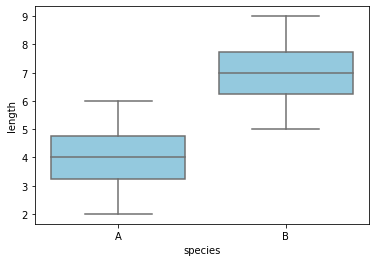

In [19]:
import seaborn as sns

sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue' ) #seaborn쓸땐 이렇게
# A에 비해 B가 긴걸 확인

In [20]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [21]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2

<AxesSubplot:ylabel='Frequency'>

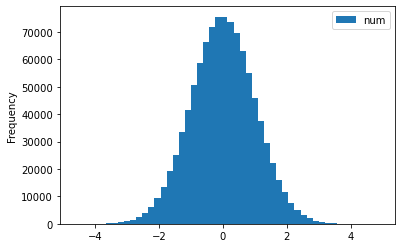

In [22]:
# 평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임을 생성해주세요.
# column 이름 num
import numpy as np
import random

a = np.random.randn(1000000)
df = pd.DataFrame(a, columns = ['num'])
df.plot(kind = 'hist', bins = 50)

- 평균이 10, 표준편차 2, 샘플 10000

<AxesSubplot:ylabel='Frequency'>

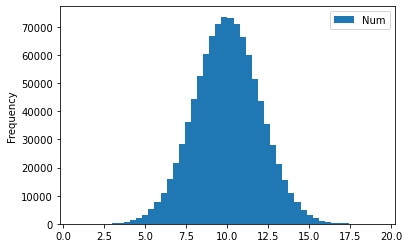

In [23]:
from scipy import stats
import numpy as np

np.random.seed(1)
sample1 = stats.norm.rvs(loc=10, scale = 2, size = 1000000)  # stats.norm - 정규분포. 꼭 표준은아님
                        # loc : 평균, scale : 표준편차, size : 샘플개수
df1 = pd.DataFrame(sample1, columns=['Num'])
df1.plot(kind = 'hist', bins = 50)

In [141]:
import matplotlib.pyplot as plt
plt.style.available # 가능한 스타일들 보여줌

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [146]:
plt.style.use('default') # default라는 디자인이 적용된것

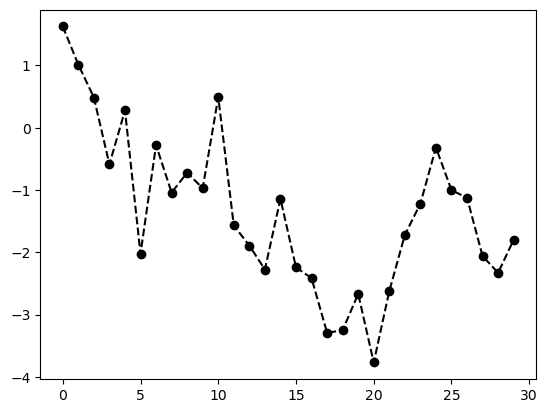

In [147]:
import matplotlib.pyplot as plt
from numpy.random import randn   # 이렇게하면 바로 randn 사용 가능
np.random.seed(1)

plt.plot(randn(30).cumsum(), linestyle = 'dashed', color = 'k', marker= 'o')   # cumsum : 누계,합계

In [25]:
data = np.random.randn(1000)
print(data[:10])
cdata = data.cumsum()
cdata[:10]

[-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416]


array([-0.69166075, -1.08841428, -1.77558698, -2.62079262, -3.29203875,
       -3.30470335, -4.4220137 , -4.187598  , -2.52779582, -1.78575166])

Text(0.5, 0, 'Stages')

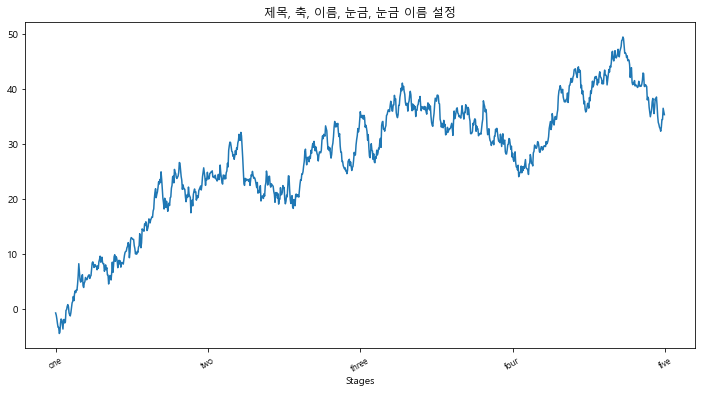

In [26]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc # 한글넣기

font_path = 'dataset/malgun.ttf' # 해당파일 visualization > dataset에 있음
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력하게 해주는것

fig = plt.figure(figsize=(12,6))   # figsize 그래프사이즈
ax = fig.add_subplot(1,1,1)   # 1행1열 1개
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000]) # x축 각각 레이블 수치
labels = ax.set_xticklabels(['one','two','three','four','five'],         # x축 레이블 붙임
                           rotation=30, fontsize='small')  # 레이블 30초회전, 글씨크기 작게

ax.set_title('제목, 축, 이름, 눈금, 눈금 이름 설정')
ax.set_xlabel('Stages')  # x축 label 이름 붙음


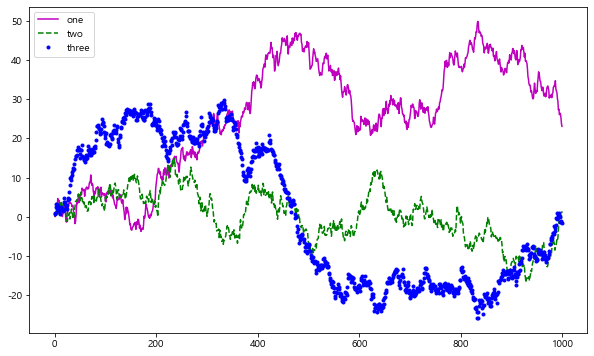

In [27]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'm', label='one')  # 'm' : 마젠타칼라
ax.plot(randn(1000).cumsum(), 'g--', label='two') # 그린
ax.plot(randn(1000).cumsum(), 'b.', label='three') # 블루

plt.legend(loc='best') # legend : 범례

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

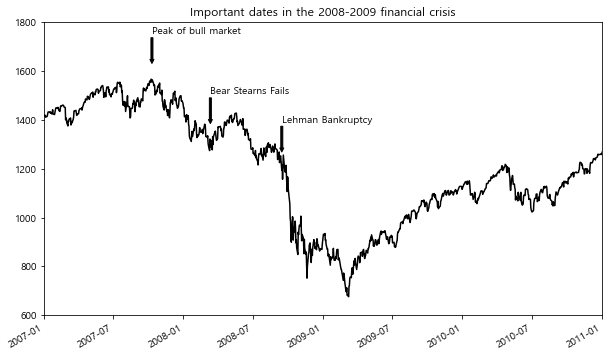

In [28]:
# 주석과 글자는 text, arrow, annotate 함수를 이용하여 추가
from datetime import datetime

fig = plt.figure(figsize =(10,6))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('dataset/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')


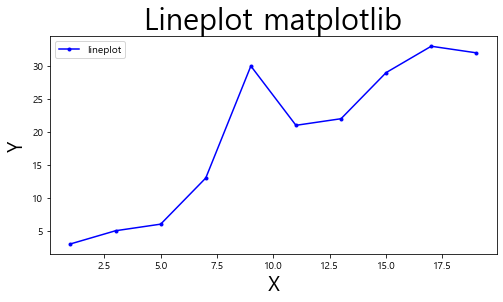

In [29]:
# x와 y를 지정해줬을때 선 그리는법
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize = (8,4)) # 맵 사이즈
plt.plot(x,y, color='blue', marker='o', markersize=3)
plt.title('Lineplot matplotlib', size = 30)  # 맵 이름, 이름의 사이즈
plt.xlabel('X', size = 20) # x라벨, 사이즈
plt.ylabel('Y', size = 20)
plt.legend(labels=['lineplot'])  #범례

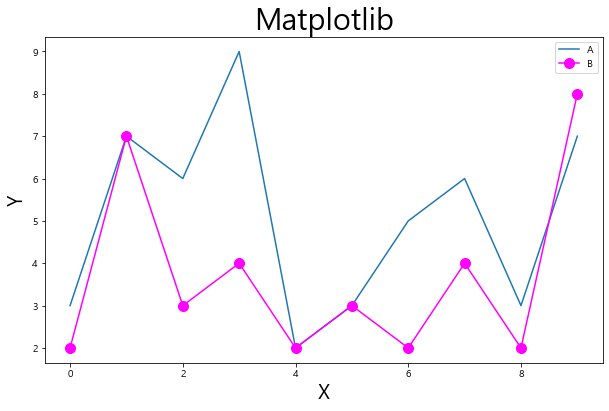

In [30]:
np.random.seed(10)
x = np.arange(10)
y1 = np.random.randint(2,10,size=10)
y2 = np.random.randint(2,10,size=10)
plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2, color='magenta', marker='o', markersize=10)
plt.title('Matplotlib', size = 30)  # 맵 이름, 이름의 사이즈
plt.xlabel('X', size = 20) # x라벨, 사이즈
plt.ylabel('Y', size = 20)
plt.legend(labels=['A','B'])

- bar plot (막대그래프, 수직 막대)

Text(0.5, 1.0, 'Bar Plot')

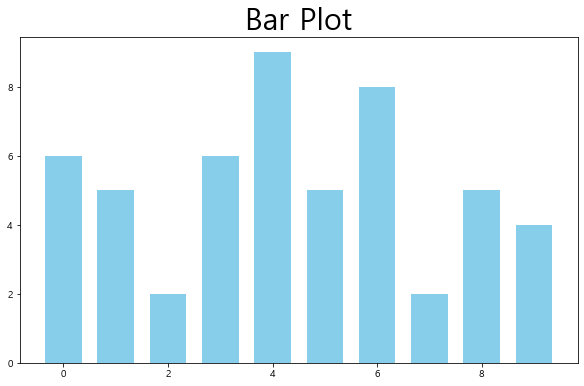

In [31]:
y = np.random.randint(2,10,size=10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x, y, width=0.7, color='skyblue')
plt.title('Bar Plot', size = 30)

- barh (수평 막대)

<AxesSubplot:>

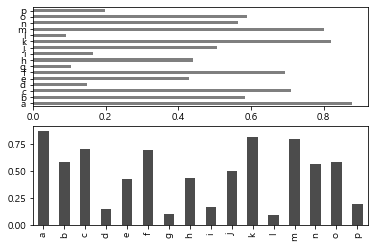

In [40]:
import pandas as pd
fig, axes = plt.subplots(2,1)  # 2행1열로 그림
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop')) # rand : 0~1사이 균일분포
# print(data)

data.plot.bar(ax=axes[1], color='k', alpha=0.7)  # alpha : 투명도
data.plot.barh(ax=axes[0], color='k', alpha=0.5)

              A         B         C         D
one    0.514764  0.757286  0.177789  0.082620
two    0.482072  0.528854  0.696308  0.204762
three  0.671372  0.793269  0.041738  0.963358
four   0.975393  0.550661  0.064907  0.345237
five   0.020430  0.800852  0.207927  0.143253
six    0.699894  0.057950  0.256608  0.510332


<AxesSubplot:>

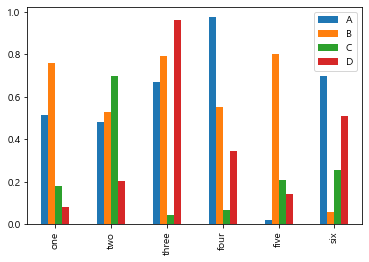

In [48]:
# 각 로우의 값을 묶어서 그룹별 막대그래프로 표현
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns = ['A','B','C','D'])
print(df)
df.plot.bar()

- 누적 막대그래프

<AxesSubplot:>

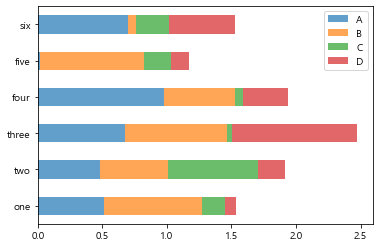

In [49]:
df.plot.barh(stacked = True, alpha=0.7)  # 누적할때 스택=참, 알파 : 투명도

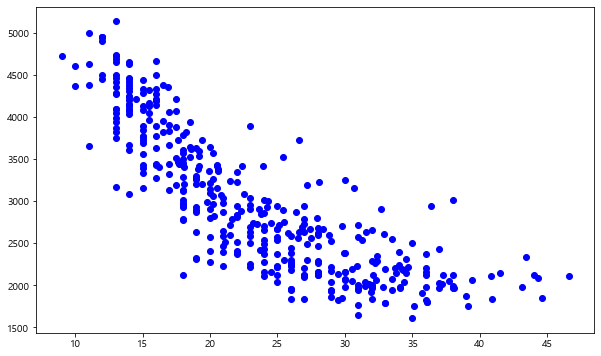

In [53]:
# scatter plot
df_auto = pd.read_excel('../dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue')

In [57]:
df_auto[['mpg','weight','displacement','cylinders']].corr()
# [[]] :  겉 []는 해당 열 지정, 안의 []는 리스트

,mpg,weight,displacement,cylinders
mpg,1.000000,-0.831741,-0.804203,-0.775396
weight,-0.831741,1.000000,0.932824,0.896017
displacement,-0.804203,0.932824,1.000000,0.950721
cylinders,-0.775396,0.896017,0.950721,1.000000


In [56]:
df_auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

- histogram (히스토그램)

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

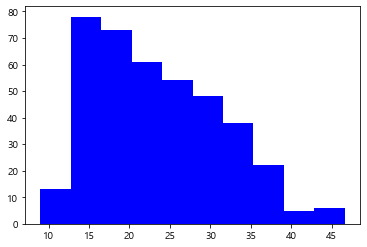

In [58]:
plt.hist(x, bins=10, color='blue') # x 위에 df_auto.mpg

- box plot (박스플랏)

<AxesSubplot:>

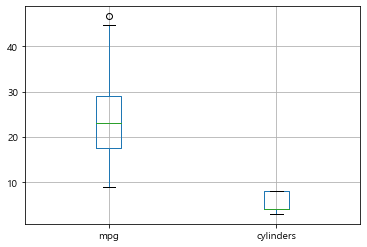

In [59]:
df_auto.boxplot(column=['mpg','cylinders'])

In [150]:
#위 데이터와 관계는 없지만 스타일 적용해보기
# seaborn 내장 테마 : darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')

In [65]:
import seaborn as sns

tips = pd.read_csv('dataset/tips.csv')
print(tips.head(), '\n')

party_counts = pd.crosstab(tips['day'],tips['size']) # 크로스탭 만들기
print(party_counts.head, '\n')

party_counts = party_counts.loc[:,2:5] # size에 2~5뽑음

# Normalize to sum to 1  / 전체 합계를 1로 본것을 일반화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts # 1로 정규화된 표가 나옴

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4 

<bound method NDFrame.head of size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3> 



size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [69]:
# 팁에 대해 정리를 좀 해보면
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # 마크업(분자/(분모-분자))
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

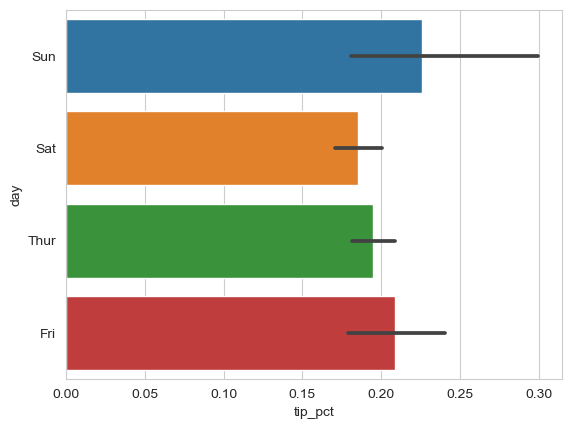

In [149]:
# 요일별 팁 퍼센트 구하기
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

# 그래프에 있는 검은 선은 오차율. 길수록 가변성이 높음. 신뢰구간. 

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

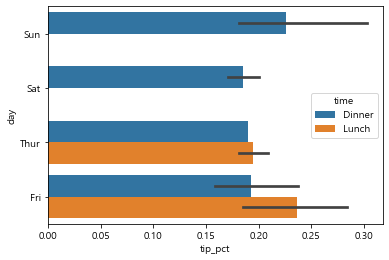

In [71]:
# 요일별 팁 퍼센트를 시간대별로 구하기
sns.barplot(x='tip_pct', y='day', hue = 'time', data=tips, orient='h')

<AxesSubplot:xlabel='size', ylabel='count'>

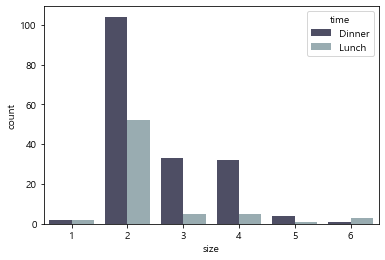

In [72]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot('size', hue='time', data = tips, palette='bone')  # 팔레트 : 디자인

<AxesSubplot:xlabel='length', ylabel='Density'>

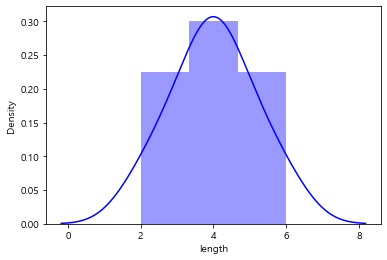

In [114]:
import pandas as pd

fish_multi = pd.read_csv('dataset/4_fm2.csv')
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species == "A"')['length']  #길이컬럼
length_b = fish_multi.query('species == "B"')['length']

sns.distplot(length_a, color='blue') # 막대는 히스토그램. 밀도를 보여줌, 그래프 안쪽면적 합은 1

<AxesSubplot:xlabel='length'>

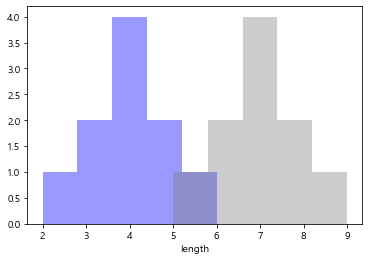

In [117]:
sns.distplot(length_a, bins=5, color='blue', kde=False)  # kde : kernel density estimation
sns.distplot(length_b, bins=5, color='gray', kde=False)

<AxesSubplot:xlabel='length', ylabel='Density'>

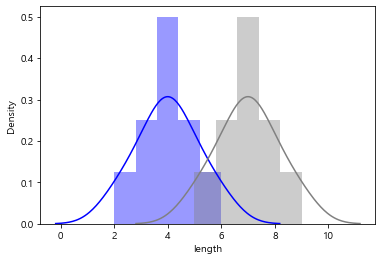

In [118]:
sns.distplot(length_a, bins=5, color='blue')
sns.distplot(length_b, bins=5, color='gray')

<AxesSubplot:xlabel='species', ylabel='length'>

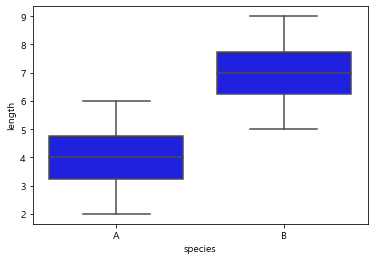

In [119]:
sns.boxplot(x='species', y='length', data= fish_multi, color='blue')

- 바이올린 플롯

<AxesSubplot:xlabel='species', ylabel='length'>

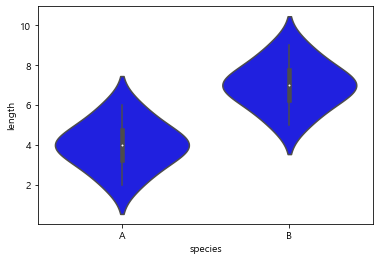

In [121]:
# 상자 대신 히스토그램을 세로로 세워서 배치한 상자 그림. 어느 부분에 데이터가 집중되어있는지 정보 획득 가능
sns.violinplot(x='species', y='length', data=fish_multi, color='blue')

# 정규분포 붙인것처럼 생김

In [122]:
import pandas as pd
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


- jointplot

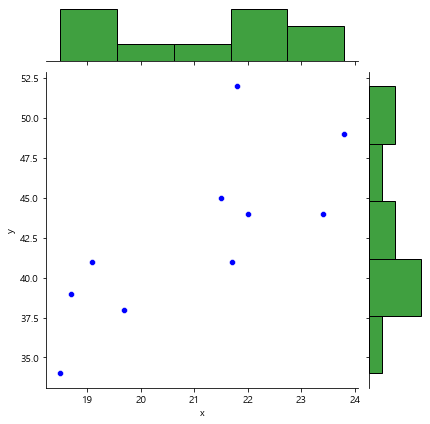

In [125]:
sns.jointplot(cov_data.x, cov_data.y,
             joint_kws = {'color':'blue'},
             marginal_kws = {'color':'green'})

# 막대와 산점도가 같이나옴. y막대그래프는 오른쪽에, x는 위에

In [127]:
df_auto = pd.read_excel('../dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


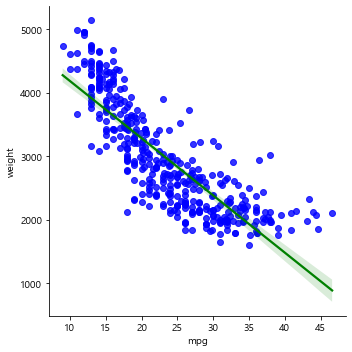

In [129]:
# lmplot은 최적의 방정식 직선을 그려줌
sns.lmplot(x='mpg',y='weight', data = df_auto, scatter_kws={'color':'blue'}, line_kws={'color':'green'})

# 오차의 범위를 최소화 할수 있는 기울기와 절편을 스스로 계산해서 그래프를 그려줌.(y=ax+b)

<AxesSubplot:xlabel='mpg', ylabel='weight'>

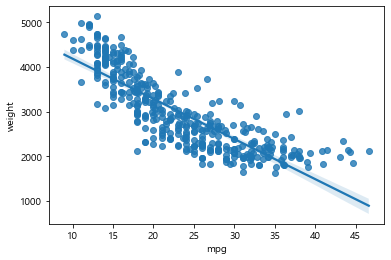

In [130]:
sns.regplot(x='mpg', y='weight', data=df_auto, fit_reg=True)   # fit_reg는 회귀선 넣을지 여부.

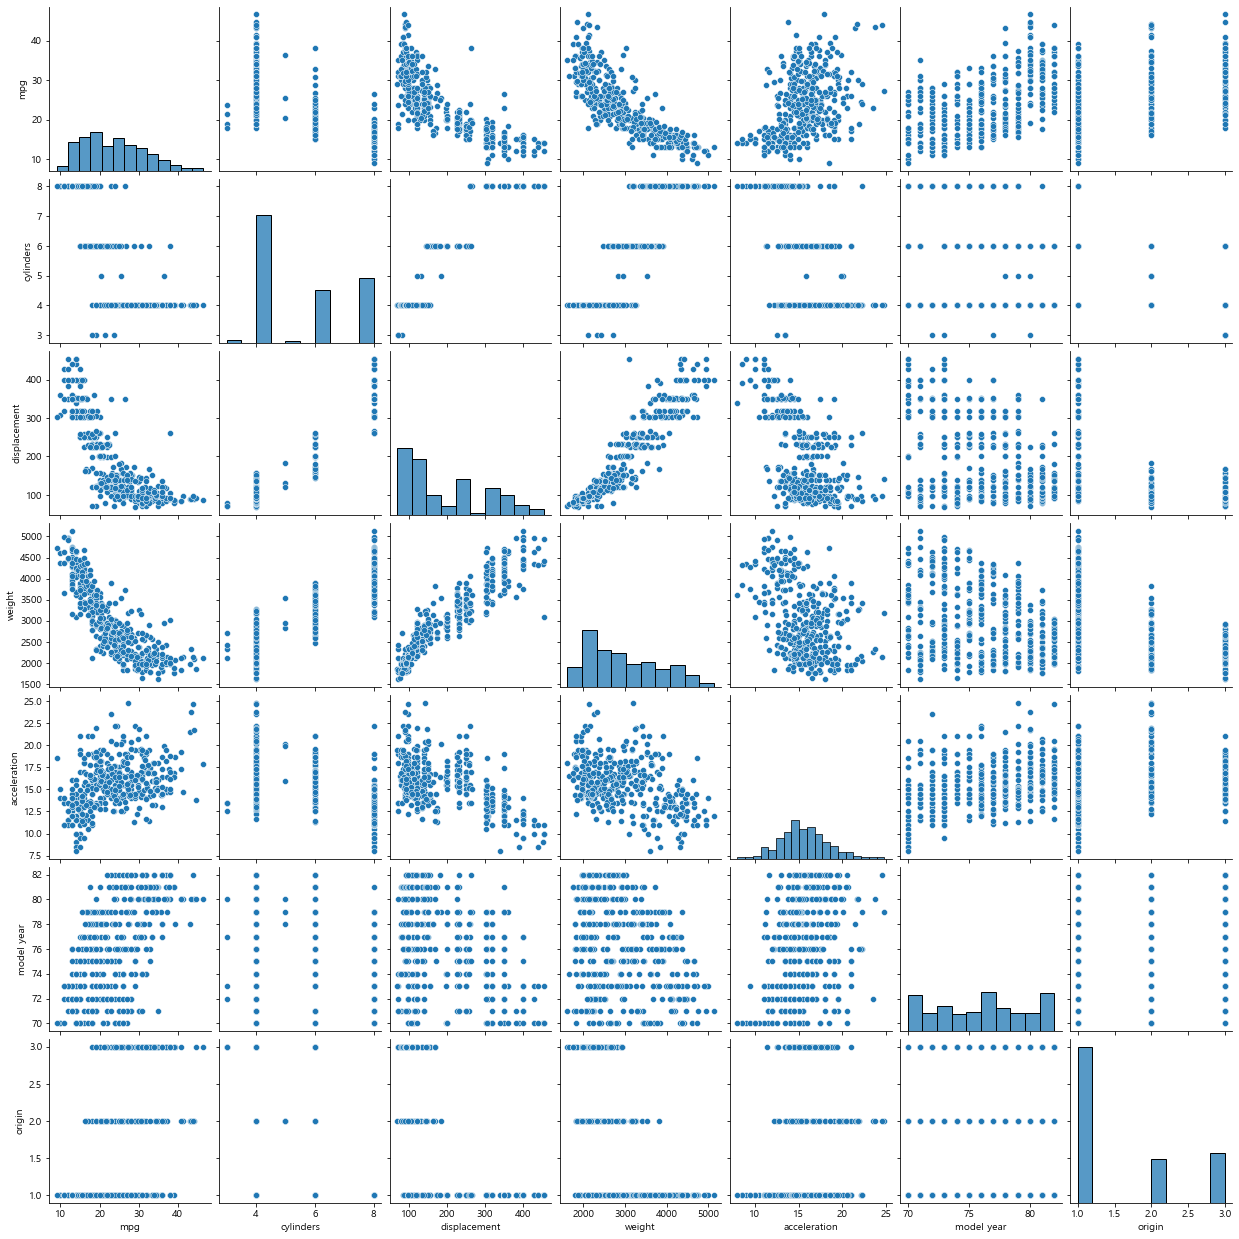

In [131]:
sns.pairplot(df_auto, palette='gray')

- 히트맵 (heatmap)

Text(0.5, 1.0, 'Heatmap of the Dataset')

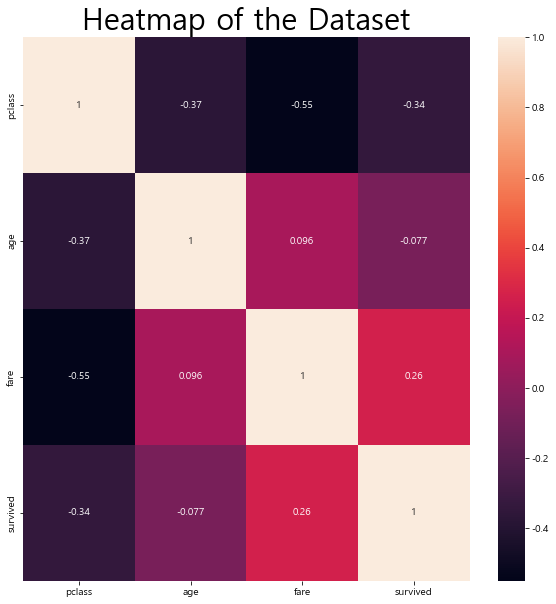

In [138]:
t_df = sns.load_dataset('titanic')
plt.figure(figsize=(10,10))
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(), annot=True)   # annot : 주석
# 히트맵을 본다 > 해당 열들의 > 상관관계를.

plt.title('Heatmap of the Dataset', fontsize=30)
# 0의 색을 기준으로 어두워지면 역의 상관관계, 밝은쪽으로는 양의상관관계를 보여준다

- pivot

In [139]:
table = t_df.pivot_table(index=['sex'], columns=['class'], values=['survived'], aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

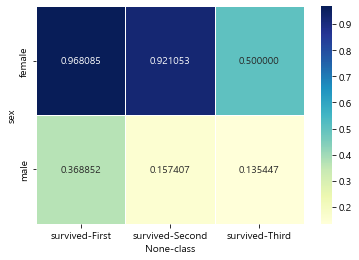

In [140]:
sns.heatmap(table, annot=True, fmt='f', cmap='YlGnBu', linewidth = .5, cbar=True) # cbar : 컬러바    ylgnbu